# Desafio Climatempo


### Importando as biliotecas que serão usadas

In [1]:
import xarray as xr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Lendo os arquivos NetCDF4

In [2]:
df_obs = xr.open_dataset('observation.nc')['temperatura']
df_prev = xr.open_dataset('forecast.nc')['t2m']
df_prev -= 273.15

### Atribuindo a uma variável os dados de tempo com um intervalo de 06h

In [3]:
time_range = pd.date_range(df_prev.time.values.min(), df_prev.time.values.max(), freq='6H')

### Definindo a função que será usada para calcular o índice RMSE

In [4]:
def calculo_rmse(prev, obs):
    rmse_list = []
    for i in time_range:
        rmse_range = ((prev.loc[i].values - obs.loc[i].values)**2)**0.5
        rmse_list.append(rmse_range)
    return rmse_list

### Calculando índices RMSE com os dados previstos e os dados observados

In [5]:
rmse_list = calculo_rmse(df_prev, df_obs)

### Gerando um gráfico para cada índice RMSE gerado

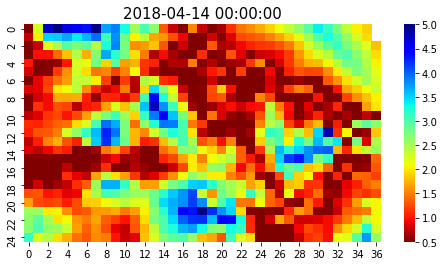

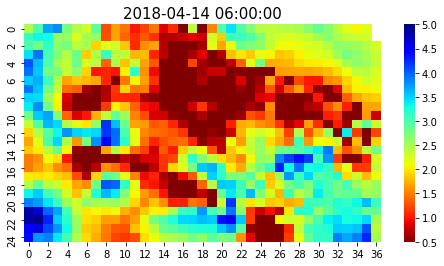

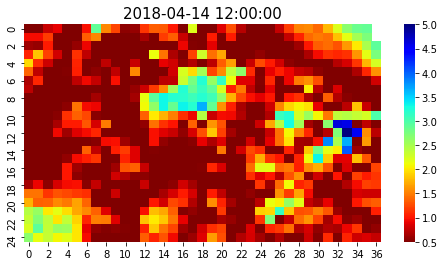

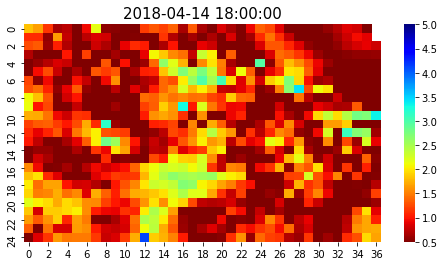

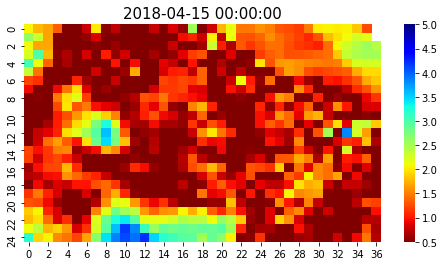

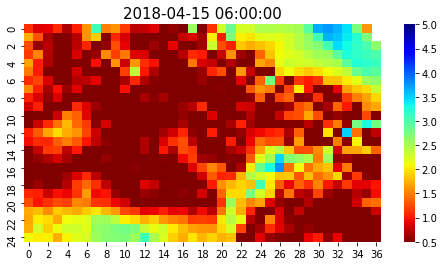

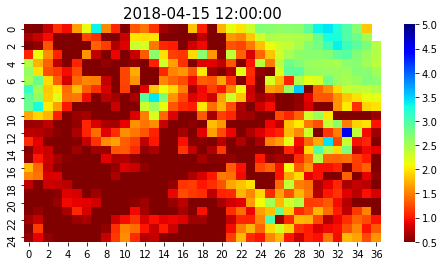

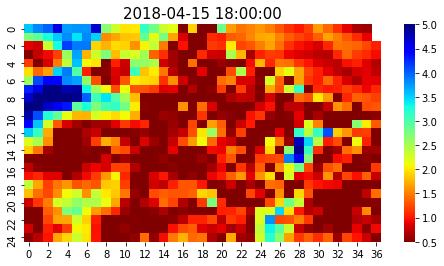

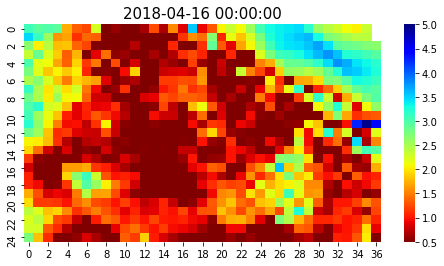

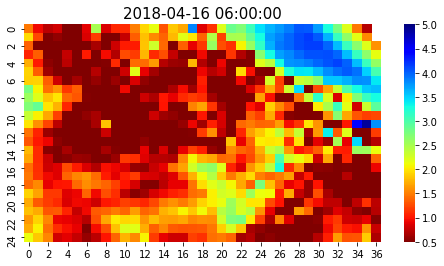

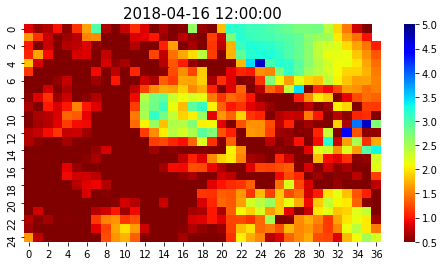

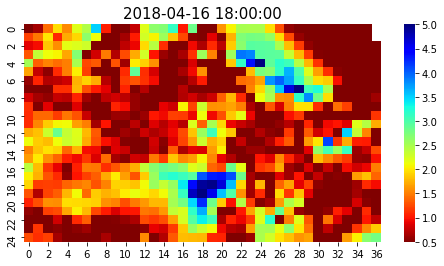

In [6]:
for i in range(len(time_range)):
    fig, ax = plt.subplots(figsize=(8,4))
    plt.title(time_range[i], fontsize=15)
    sns.heatmap(rmse_list[i], cmap="jet_r", vmin=0.5, vmax=5)
    plt.show()

### Obtendo os dados de acordo com a latitude e longitude de São Paulo

In [7]:
sp_prev = df_prev.sel(lat=-23.5489, lon=-46.6388, method='nearest')
sp_obs = df_obs.sel(lat=-23.5489, lon=-46.6388, method='nearest')

### Calculando o índice RMSE com os dados de São Paulo

In [8]:
rmse_sp = calculo_rmse(sp_prev, sp_obs)

### Gerando o gráfico referente aos índices RMSE calculados 

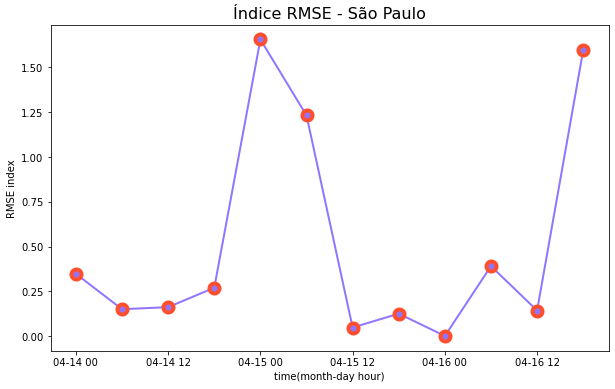

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
plt.rc('font', size=11)
plt.plot(time_range, rmse_sp, color='#9275FF', linewidth=2, marker='o', ms=10, mew='4', mec='#FF4F2D')
ax.set(xlabel='time(month-day hour)', ylabel='RMSE index')
plt.title('Índice RMSE - São Paulo', fontsize=16)
plt.show()